# The path of improvement: assembly nest position analysis
This notebook contains the code for the figures and analysis associated with the chapter *The path of improvement* regarding the subsection focused on assembly nests in *The manufacturing engineers guide to Statistical Process Control and Data Driven Improvement*.

If you have questions regarding the content of this notebook contact Jim Lehner by email at James.Lehner@gmail.com 

To install the ```improvement.py``` library directly from GitHub without cloning the repository, enter the following command using the command prompt: ```pip install git+https://github.com/jimlehner/improvement```.

For more details visit https://github.com/jimlehner/improvement.

In [22]:
# Specify libraries
import process.improvement as pi
import os

%matplotlib inline

In [23]:
# dataset URL
dataset_url = r'https://raw.githubusercontent.com/jimlehner/ddi-datasets/main/data/assembly-nest-position-data.csv'

In [24]:
# Get data function
def get_data() -> pd.DataFrame:
    return pd.read_csv(dataset_url)

# Get data
df = get_data()
df.head()

,Assembly Nest,Location (mm),Stage
0,1,7.46,As-recieved
1,2,8.93,As-recieved
2,3,8.78,As-recieved
3,4,9.12,As-recieved
4,5,8.48,As-recieved


In [25]:
# Get unique stages
unique_stages = df['Stage'].unique().tolist()
# Create list of dfs for use in xchart_comparison
list_of_dfs = [df[df['Stage'] == stage].reset_index(drop=True) for stage in unique_stages]

In [26]:
# Individual data frames for each stage
as_recieved = df[df['Stage'] == 'As-recieved']
adjusted = df[df['Stage'] == 'Adjusted'].reset_index(drop=True)

## Process behavior charts

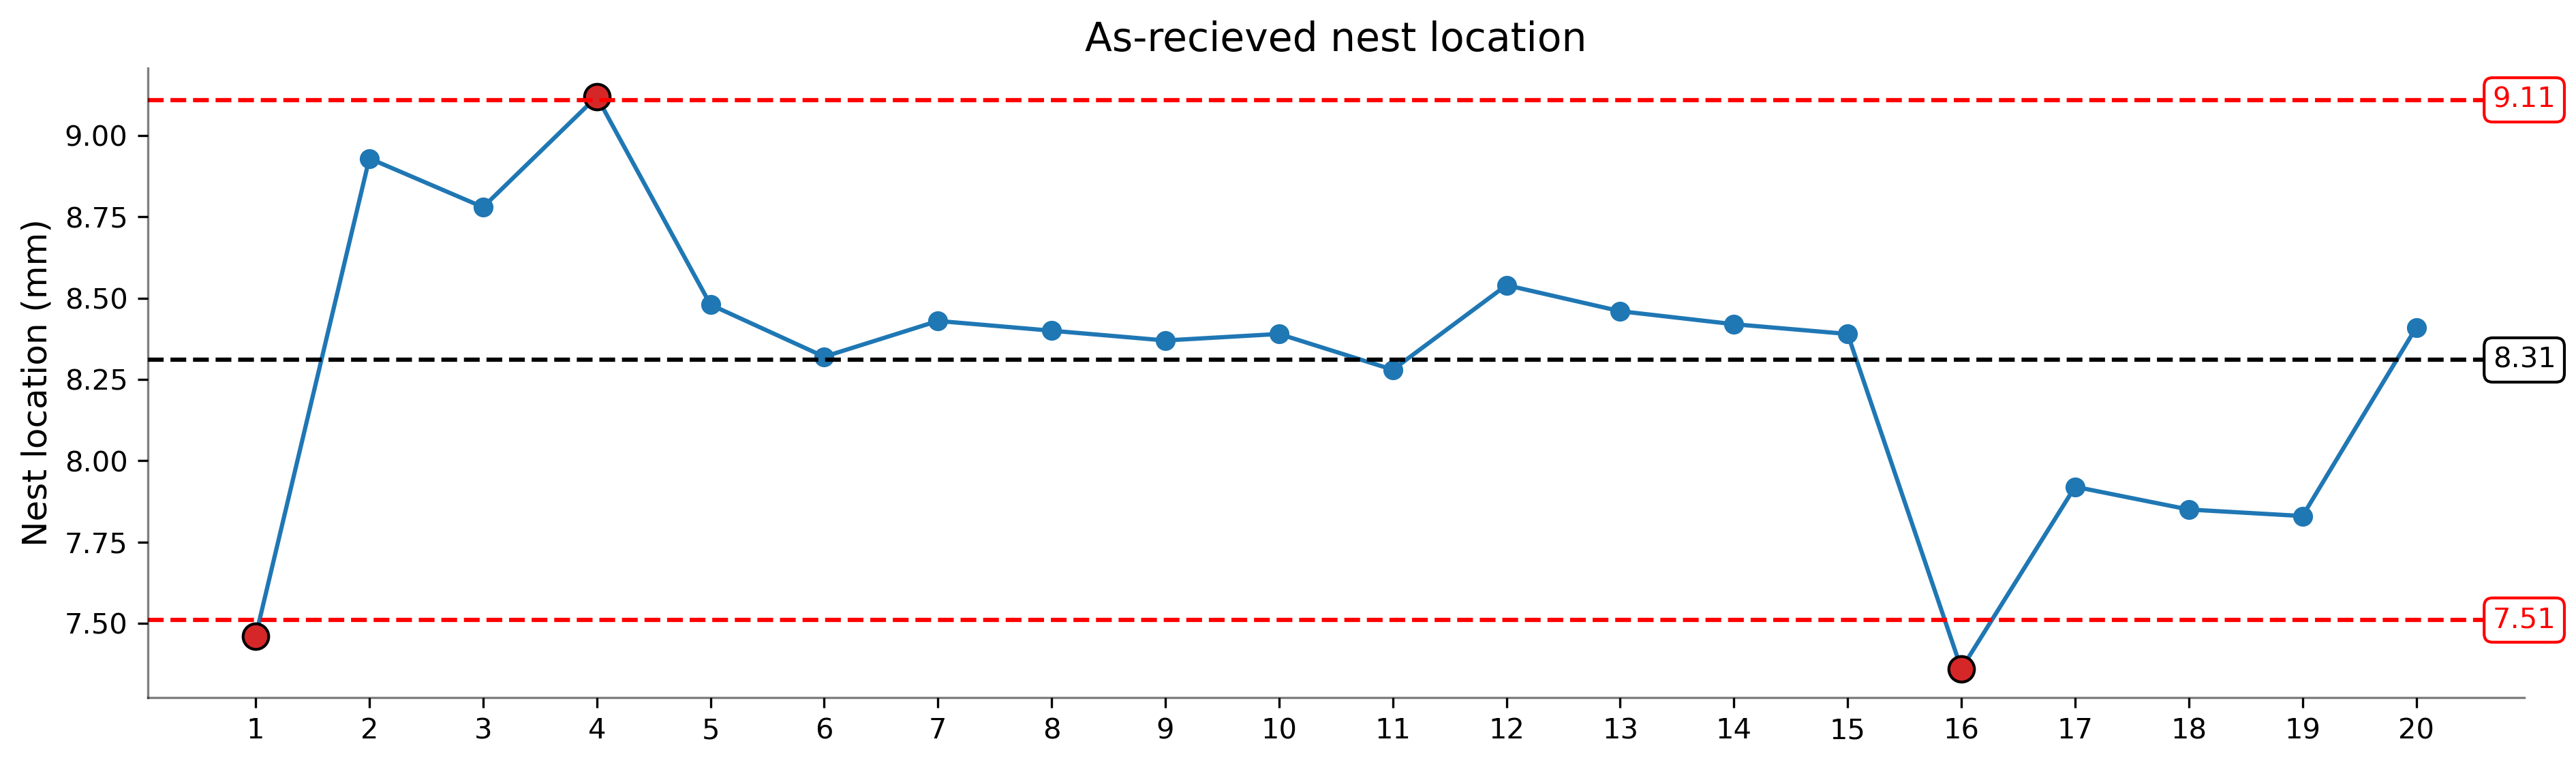

In [27]:
as_rescieved_results = pi.xchart(as_recieved, 'Location (mm)', 'Assembly Nest', fig_size=(15,4), 
          title='As-recieved nest location', y_label='Nest location (mm)', tickinterval=1, round_value=2)

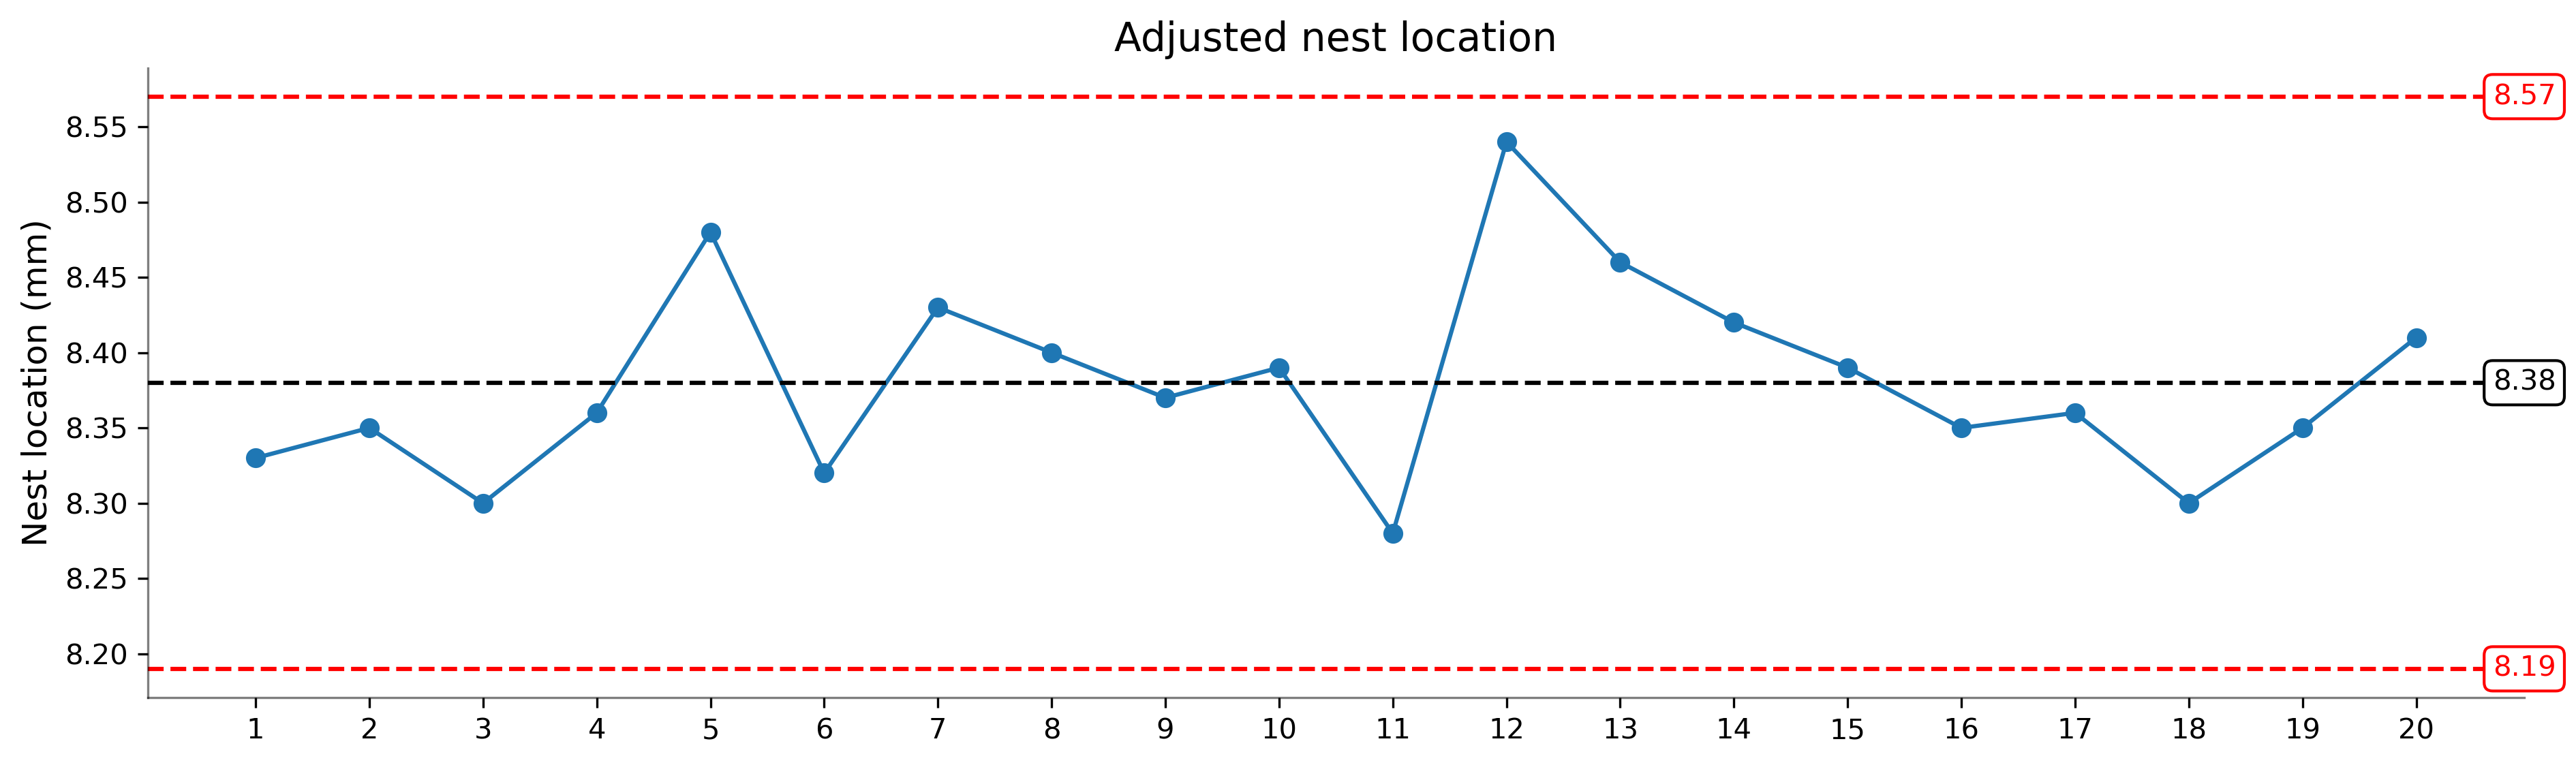

In [28]:
adjusted_results = pi.xchart(adjusted, 'Location (mm)', 'Assembly Nest', fig_size=(15,4), 
          title='Adjusted nest location', y_label='Nest location (mm)', tickinterval=1, round_value=2)

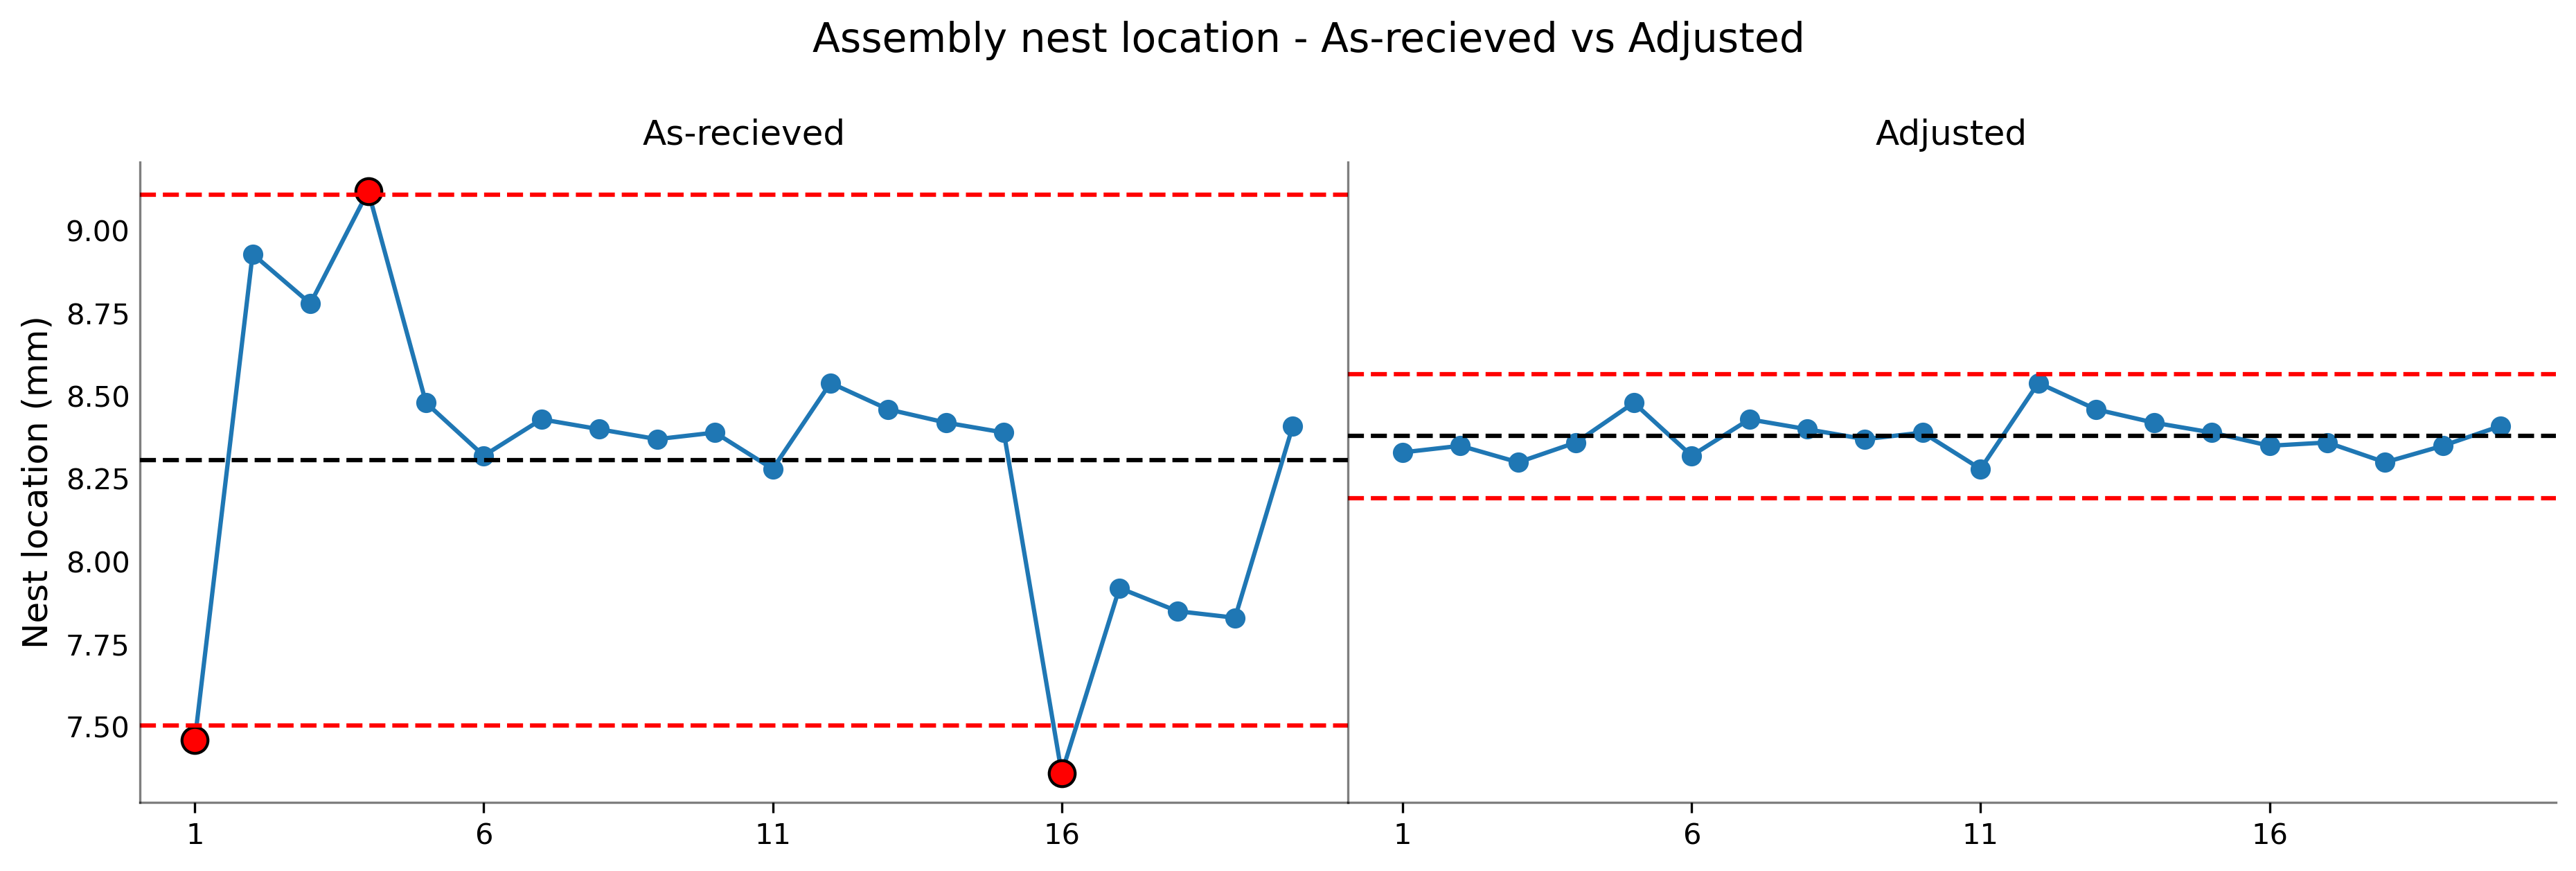

,Labels,Mean,UPL,LPL,PLR,AmR,URL,Characterization
0,As-recieved,8.3070,9.1092,7.5048,1.6044,0.301579,0.98556,Unpredictable
1,Adjusted,8.3795,8.5671,8.1919,0.3752,0.070526,0.23048,Predictable


In [29]:
pi.xchart_comparison(list_of_dfs, 'Location (mm)', 'Assembly Nest', unique_stages, figsize=(15,4), 
                    title='Assembly nest location - As-recieved vs Adjusted', y_label='Nest location (mm)')